In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

# Hypothesis Testing

## t-test
### t-distribution
A t-test is used when the test statistic follows a normal distribution with a unknown standard deviation $\sigma$. In this case, the standard deviation is replaced by the sample standard deviation *s* which an estimate based on the data and the test statistics will follow a Student's *t* distribution. The *t*-distribution is dependent on the sample size, and a sample with *n* observations will have $\nu = n-1$ degrees of freedom. A *t*-distribution with low degree of freedom $\nu$ will have fatter tails compared with a normal distribution, reflecting the noiser estimate of $\sigma$ for small sample sizes. The *t*-distribution approaches normal distribution as $\nu$ becomes large as shown in the plots below: 


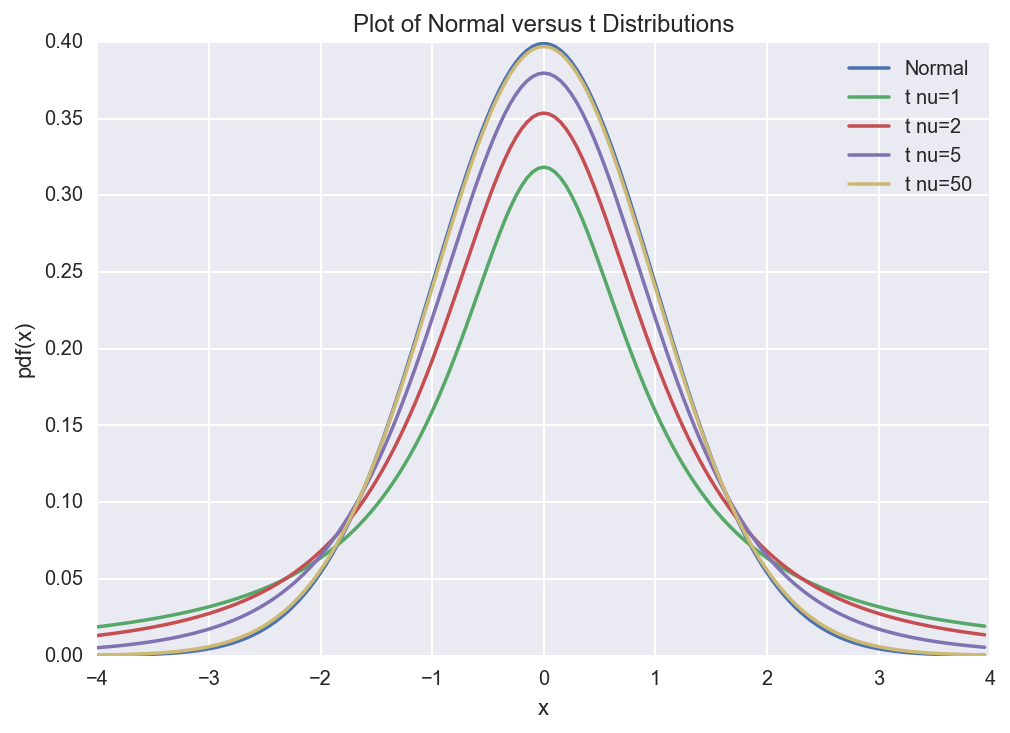

In [2]:
# Comparison between the normal and student t distributions

import numpy as np
import matplotlib.pylab as plt
from scipy import stats

x = np.arange(-4,4,.05)
plt.plot(x, stats.norm.pdf(x), label="Normal")
plt.plot(x, stats.t.pdf(x, 1), label="t nu=1")
plt.plot(x, stats.t.pdf(x, 2), label="t nu=2")
plt.plot(x, stats.t.pdf(x, 5), label="t nu=5")
plt.plot(x, stats.t.pdf(x, 50), label="t nu=50")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title("Plot of Normal versus t Distributions")
plt.legend()
plt.show()

### t-value and p-value

As an example, suppose that we have six quarters and want to find if the weight of this sample of quarters is significantly different from $\mu_0 = 5.67$ grams which is the weight specified by the US Mint. The weight of the six quarters were measured to be:

X = [5.680, 5.690, 5.659, 5.630, 5.596, 5.667]

In this case, the mean weight $\overline{x} = 5.6537$ and the sample standard deviation is

$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x})^2} = 0.0349$

The t-value is defined as:

$t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}} = -1.1449$

The p-value is defined as the probability of finding a result equal to or more extreme than what was observed. Since we are concerned about the weight of the coin being far below or above $\mu_0$, this entails a two-sided test. For the level of significance $\alpha = 0.05$, the critical t value $t_c = 2.5706$. Since the absolute value of our observed t value is below the critical t value, the null hypothesis should be accepted and we cannot say that the average weight of six quarters is significantly different from the US Mint value.

In [3]:
# calculations for the examples above
mu0 = 5.67  # standard weight of a quarter
sample = [5.680, 5.690, 5.659, 5.630, 5.596, 5.667]
xmean = np.mean(sample)
sstd = np.std(sample, ddof=1)
tvalue = (xmean - mu0)/(sstd/np.sqrt(len(sample)))

print("mean: %.4f" % xmean)
print("sample std: %.4f" % sstd)
print("tvalue: %.4f" % tvalue)

# This function does all the work for you
stats.ttest_1samp(sample, 5.67)

mean: 5.6537
sample std: 0.0349
tvalue: -1.1449


Ttest_1sampResult(statistic=-1.1449348178217662, pvalue=0.30406604330182502)

t_critical at alpha=0.050000: 2.5706


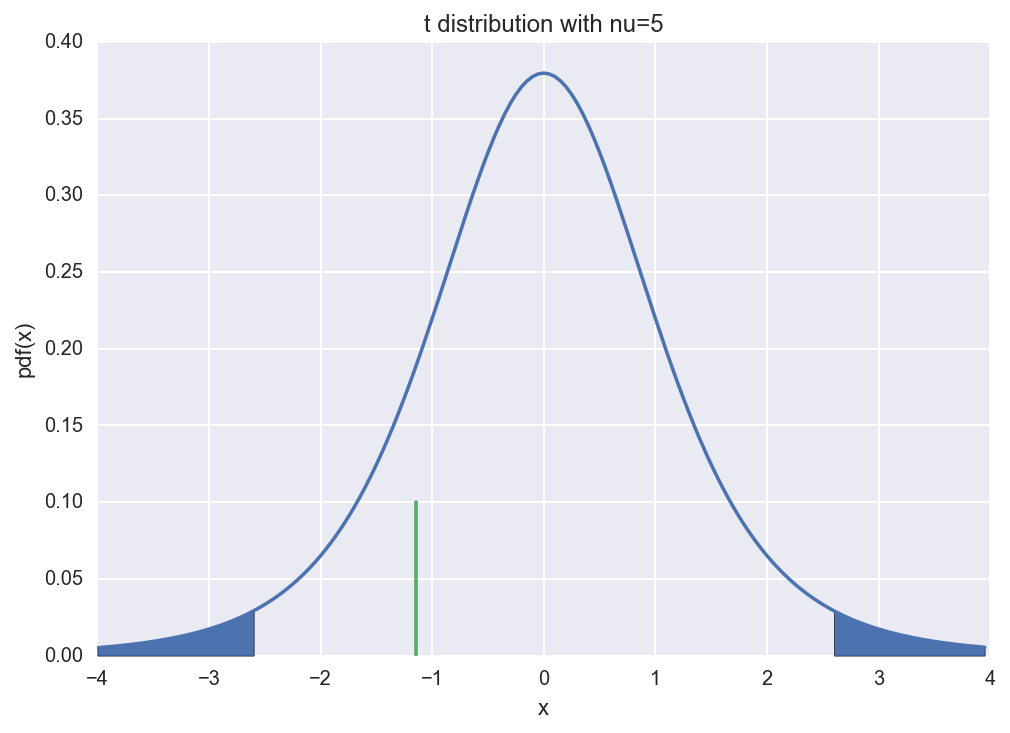

In [4]:
# Graphical representation of the calculated t value
alpha = 0.05
nu = len(sample) - 1
z = np.arange(-4,4,.05)
y = stats.t.pdf(z, nu)
tc = abs(stats.t.ppf(alpha/2, nu))

zminus = [zi for zi in z if zi < -tc]
zplus = [zi for zi in z if zi > tc]

fig, ax = plt.subplots()
ax.plot(z, y)
ax.plot([tvalue, tvalue], [0, 0.1])
ax.fill_between(zminus, 0, stats.t.pdf(zminus, nu))
ax.fill_between(zplus, 0, stats.t.pdf(zplus, nu))
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.title("t distribution with nu=%d" % nu)

print("t_critical at alpha=%f: %.4f" % (alpha, tc))

## precision-recall

Possible results of hypothesis testing

|                   |       Truth Positive     |      Truth Negative     |
|-------------------|:------------------------:|:-----------------------:|
| **Test Positive** |     True Positive        | False Positive (Type I) |
| **Test Negative** | False Negative (Type II) |     True Negative       |

precision = tp/(tp+fp), recall = tp/(tp+fn)

Decrease $\alpha$: less false positives, more false negatives => higher precision, lower recall

Increase $\alpha$: more false positives, less false negatives => lower precision, higher recall

We demonstrate this effect below.

In [5]:
np.random.seed(92837)
mu0 = 4.67
sigma = 0.05
sample_size = 6
n_samples = 100

rvs = stats.norm.rvs(loc=mu0, scale=sigma, size=(sample_size, n_samples))

# null hypothesis samples 
tvalues1, pvalues1 = stats.ttest_1samp(rvs, mu0)
# alternate hypothesis samples
tvalues2, pvalues2 = stats.ttest_1samp(rvs, mu0+2*sigma)

for alpha in [0.05, 0.01]:
    fp = sum([1 for p in pvalues1 if p < alpha])
    tp = n_samples - fp
    tn = sum([1 for p in pvalues2 if p < alpha])
    fn = n_samples - tn
    
    print("alpha = %.2f" % alpha)
    print("       | true P | true N")
    print("test P | %6d | %6d" % (tp, fp))
    print("test N | %6d | %6d" % (fn, tn))
    print("precision: %.3f recall: %.3f" % (float(tp)/(tp+fp), float(tp)/(tp+fn)))
    print("")


alpha = 0.05
       | true P | true N
test P |     94 |      6
test N |      2 |     98
precision: 0.940 recall: 0.979

alpha = 0.01
       | true P | true N
test P |     98 |      2
test N |     21 |     79
precision: 0.980 recall: 0.824



# Bayesian posterior inference

## Bayes' Theorem

$$p(\theta | data) = \frac{p(data | \theta) p(\theta)}{p(data)}$$

$\theta$ : parameters that needs to be evaluated based on data

$p(\theta | data)$: posterior probability, probability of $\theta$ given the data

$p(\theta)$: prior probability, estimate of the parameters from background information

$p(data | \theta)$: likelihood, probability of observing data given parameters $\theta$

$p(data)$: marginal likelihood, probability of getting the data over all possible parameters. Can be thought of as normalization parameter.

## Biased coin example 

For a specific example, let us look at the example of coin flips. Suppose that we do not know if a coin is biased and would like to calculate the probability that the coin will turn up heads after a coin flip. In this case, the parameter is the probability that the coin flip will be heads. We also assume that the prior is a uniform probability distribution using the principle of maximum entropy. The following script illustrates how distribution of the probability of head will change after each coin flip.

mean heads: 0.5200


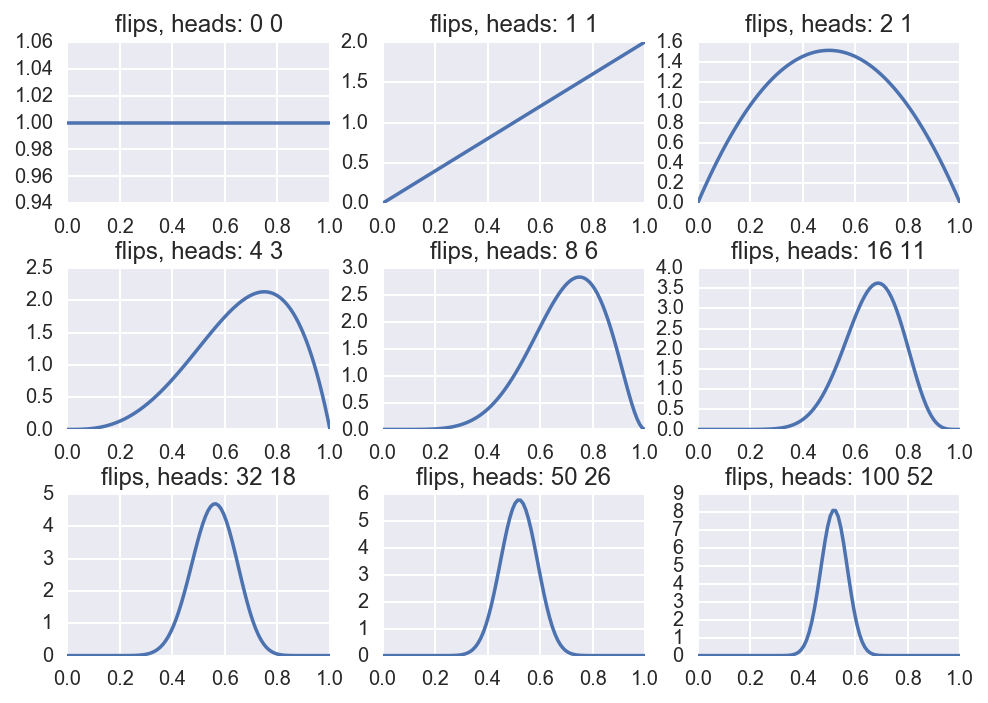

In [6]:
np.random.seed(4962)

# number of coin flips
nflips = 100

# delta: spacing of theta
delta = 0.01
# theta: probability of coin toss resulting in head
theta = np.linspace(0, 1, 1/delta)
# pdf of theta, assume uniform for the initial case
prior = np.ones(len(theta))

priors = [prior]
heads = np.random.choice([0, 1], nflips)
for i in heads:
    if i == 1:
        # in case of heads
        likelihood = theta
    else:
        # in case of tails
        likelihood = 1 - theta

    # update
    posterior = likelihood*prior
    # normalize
    prior = posterior/sum(posterior)/delta
    priors.append(prior)

#plt.plot(theta, p_th)
for i, idx in enumerate([0, 1, 2, 4, 8, 16, 32, nflips/2, nflips]):
    plt.subplot(3, 3, i + 1)
    plt.plot(theta, priors[idx])
    plt.title("flips, heads: %d %d" % (idx, sum(heads[:idx])))

plt.subplots_adjust(hspace=0.4)

print("mean heads: %.4f" % (sum(heads)/100.0))

## conjugate priors

If we can find a family of functions for the prior such that the likelihood\*prior results in a posterior that are in the same family of functions, the prior is called a **conjugate prior** for the likelihood function. In this case, the posterior has a closed form expression and numerical evaluation is not necessary.

In the example of the coin flip above, if we get $x$ heads out of $n$ coin flips, the likelihood function is a binomial distribution with the probabilty

$ p(x | \theta) = {n \choose x} \theta^x (1 - \theta)^{n-x} $

If we can choose a prior of the form

$ f(\theta; \alpha, \beta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} $

the resulting posterior function will also belong to this family of functions which is called a beta distribution.

The initial prior in our examples as a uniform distribution which corresponds to $\alpha=1$, $\beta=1$. After $x$ heads in $n$ coin flips, the posterior then becomes:

$ f(\theta; x+1, n-x+1) \propto \theta^x (1 - \theta)^{n-x}$

The plots below show that our numerical evaluation of the posterior overlap with the closed form analytical form of the posterior using conjugate priors. A table of conjugate distributions can be found [here.](https://en.wikipedia.org/wiki/Conjugate_prior)

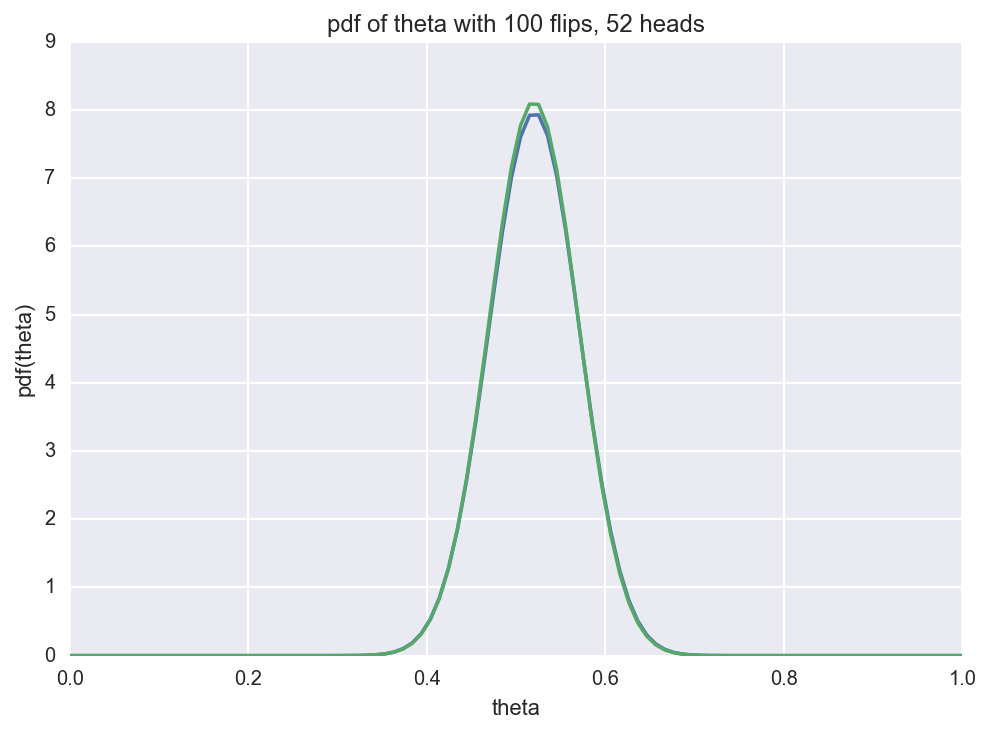

In [7]:
n_heads = sum(heads)
n_flips = len(heads)

plt.plot(theta, stats.beta.pdf(theta, n_heads, n_flips - n_heads))
plt.plot(theta, priors[100])
plt.xlabel("theta")
plt.ylabel("pdf(theta)")
plt.title("pdf of theta with %d flips, %d heads" % (n_flips, n_heads))

## Comparison between Hypothesis Testing and Bayesian Inference

### Hypothesis testing
- accepts or rejects the null hypothesis with point parameter value
- uses p-values which is $p(D | H_0)$, the probability of observing the data given null hypothesis $H_0$ is true. 


### Bayesian Inference
- results in probability distribution of parameter values which can be updated with each measurement
- needs background information for initial prior